In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
    

In [3]:
X,y = mnist.data, mnist.target


In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd


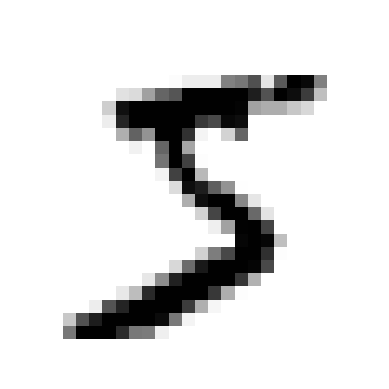

In [5]:
def show(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')


some_digit = X[0]
show(some_digit)
plt.show()

In [6]:
y[0]

'5'

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [8]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5')



In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [10]:
sgd_clf.predict([some_digit])

array([ True])

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3,shuffle= True)  # add shuffle=True if the dataset is
                                       # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95765
0.9242
0.963


In [13]:
from sklearn.model_selection import cross_val_predict
y_predictions = cross_val_predict(sgd_clf, X_train, y_train_5,cv=3)


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5,y_predictions)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5, y_predictions))
print(recall_score(y_train_5, y_predictions))
print(f1_score(y_train_5, y_predictions))   

0.8370879772350012
0.6511713705958311
0.7325171197343847


In [16]:
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [17]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

In [18]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

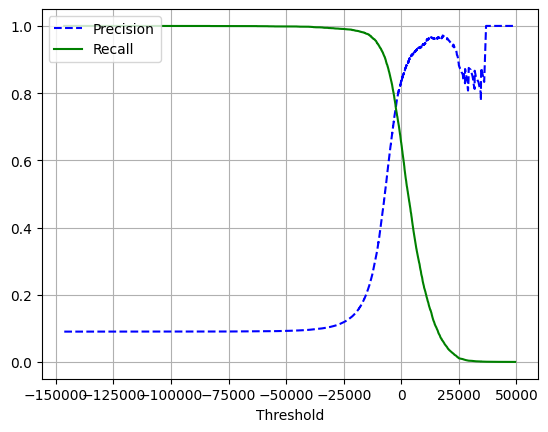

In [19]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")

plt.legend(loc="upper left")
plt.grid()
plt.show()


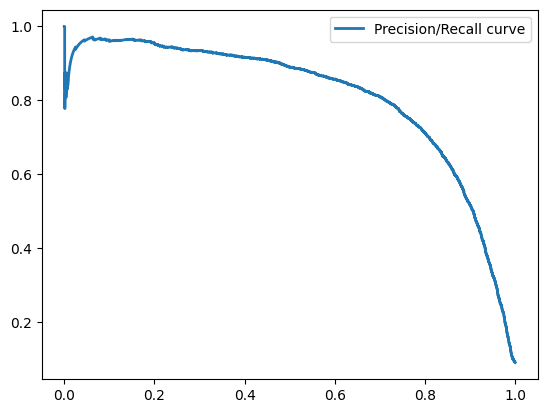

In [20]:
plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.legend()
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [21]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

np.float64(3370.019499144183)

In [22]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [23]:
y_train_pred_90

array([False, False, False, ...,  True, False, False], shape=(60000,))

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

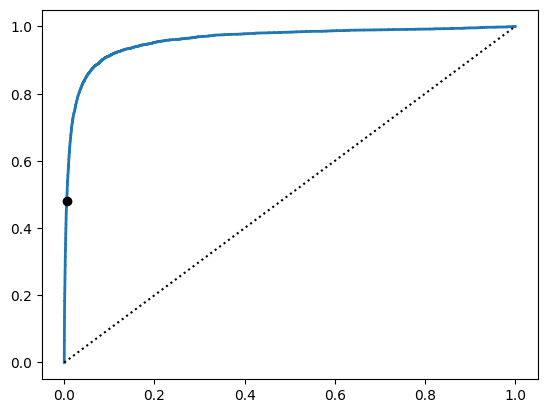

In [35]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [38]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 42)
forest_clf.fit(X_train, y_train_5)
forest_clf.predict([some_digit])

array([ True])

In [40]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,cv=3,method = "predict_proba")

In [41]:
y_forest_scores = y_probas_forest[:,1]

In [42]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_forest_scores)

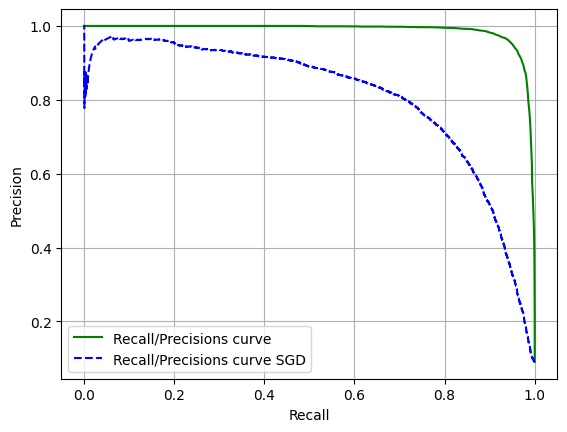

In [50]:
plt.plot(recalls_forest,precisions_forest,"g-",label="Recall/Precisions curve")
plt.plot(recalls , precisions,"b--",label="Recall/Precisions curve SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()